In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cluster import AgglomerativeClustering, FeatureAgglomeration
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root = '.'
# root = '/content/drive/My Drive/'
# dirData = root + 'large_resolution/'
newDir = root + 'large_nf_InvertZY2/'
pictureDir = root + 'large_aggl_new_fixed_quality/'
# pictureDir = root + 'large_agglomerative_pca_params/'
if not os.path.exists(pictureDir):
    os.makedirs(pictureDir)

cntps = 3

In [0]:
fmAgglLabel = 5
fmLabel = 1
zeroAgglLabel = 3
zeroLabel = 0

def checkLabel(real, pred, realLabel, predLabel):
    penalty = 0
    for i in range(len(real)):
        is_phase_in_real = False
        is_phase_in_pred = False
        if(real[i]==realLabel):
            is_phase_in_real = True
        if (pred[i]==predLabel):
            is_phase_in_pred = True
        if (is_phase_in_pred!=is_phase_in_real):
            penalty+=1
    if (len(real)==0):
        return 0
    return 1 - penalty/len(real)

In [0]:
types = [(link, dist)
         for link in  ['average', 'complete']
         for  dist in ['euclidean', 'manhattan', 'cosine']]
types.append(('ward', 'euclidean'))
print(types)

[('average', 'euclidean'), ('average', 'manhattan'), ('average', 'cosine'), ('complete', 'euclidean'), ('complete', 'manhattan'), ('complete', 'cosine'), ('ward', 'euclidean')]


In [0]:
types = []
types.append(('ward', 'euclidean'))
print(types)

[('ward', 'euclidean')]


In [0]:
def filter_data(minj, maxj, minw, maxw, wData, jData):
  #прореживание только по j
  i = 0
  j = 0
  mod1 = 80
  mod2 = 80
  resind = []
  for cur in range(len(wData)):
    if ( (j % 2 == 0) and (minw < wData[cur] <  maxw) and (minj<jData[cur]<maxj)):
      resind.append(cur)
    j = (j + 1) % mod2
    if ((cur + 1) % mod1 == 0):
      i += 1
  return(np.array(resind))


[0 3 3 ... 3 3 3]


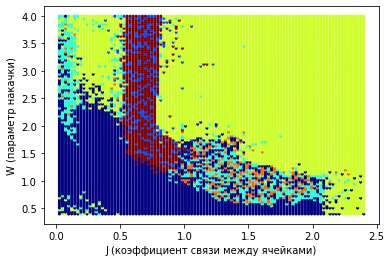

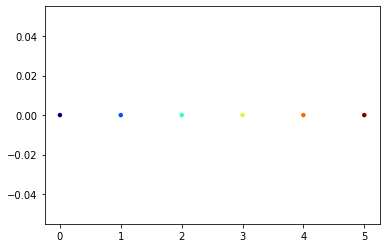

текущие параметры


In [0]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(XX)
linkage = 'complete'
affinity = 'manhattan'
aggl = AgglomerativeClustering(n_clusters=6,  linkage=linkage, affinity=affinity)
aggl.fit(X_pca)
label = aggl.labels_
print(label)
# print(np.max(label))
jmin, jmax, wmin, wmax = 0, 0.5, 1.5, 4
# ind = filter_data(jmin, jmax, wmin, wmax, wData1, jData1)
wDataN = wData1
jDataN = jData1
labelN = label
# xData = xData[ind]
# yData = yData[ind]

plt.xlabel("J (коэффициент связи между ячейками)")

plt.ylabel("W (параметр накачки)")
plt.scatter(jDataN, wDataN, s=10, c=labelN,
            edgecolor='none',
            cmap='jet', vmin=0, vmax=(6 - 1))

# plt.savefig(os.path.join(pictureDir,
#                           typen + "_" + linkage + '_' + affinity + '.png'))
plt.show()
plt.scatter(np.arange(0, 6), np.zeros(6), s=20, c=np.arange(0, 6),
            edgecolor='none',
            cmap='jet', vmin=0, vmax=(6 - 1))
plt.show()
print("текущие параметры")
# print(typen, linkage, affinity)


In [0]:
labels1 = labelN

In [0]:
fmAgglLabel = int(input("ферромагнетик"))
ch1 = checkLabel(real_labels1, labelN, fmLabel, fmAgglLabel)
print(ch1)
zeroAgglLabel = int(input("нулевая фаза"))
ch2 = checkLabel(real_labels1, labelN, zeroLabel, zeroAgglLabel)
print(ch2)
print((ch1 + ch2)/2)

In [0]:
nset = 'large_set1'
wData = np.genfromtxt(newDir + nset + '_W.dat')
jData = np.genfromtxt(newDir + nset + '_J.dat')
zData = np.genfromtxt(newDir + nset + '_Z.dat')
xData = np.genfromtxt(newDir + nset + '_X.dat')
yData = np.genfromtxt(newDir + nset + '_Y.dat')
real_labels =  np.genfromtxt(newDir + nset +  '__labels' + '.dat')


cntwj = len(wData)

In [0]:
#прореживание
i = 0
j = 0
snx10 = []
sny10 = []
snz10 = []
jData1 = []
wData1 = []
real_labels1 = []
for cur in range(cntwj):
  if (i%4 == 0 and j % 4 == 0):
    snx10.append(xData[cur])
    sny10.append(yData[cur])
    snz10.append(zData[cur])
    jData1.append(jData[cur])
    wData1.append(wData[cur])
    real_labels1.append(real_labels[cur])
  j = (j + 1) % 397
  if ((cur + 1) % 397 == 0):
    i += 1
cntwj1 = len(wData1)

In [0]:
def agf(linkage, typen, affinity, X):
    aggl = AgglomerativeClustering(n_clusters=6, linkage=linkage, affinity=affinity)
    aggl.fit(X)
    label = aggl.labels_
    print(label)
    # print(np.max(label))
    jmin, jmax, wmin, wmax = 0, 0.5, 1.5, 4
    # ind = filter_data(jmin, jmax, wmin, wmax, wData1, jData1)
    wDataN = wData1
    jDataN = jData1
    labelN = label
    # xData = xData[ind]
    # yData = yData[ind]

    plt.xlabel("J (коэффициент связи между ячейками)")

    plt.ylabel("W (параметр накачки)")
    plt.scatter(jDataN, wDataN, s=10, c=labelN,
                edgecolor='none',
                cmap='jet', vmin=0, vmax=(6 - 1))
    
    plt.savefig(os.path.join(pictureDir,
                             typen + "_" + linkage + '_' + affinity + '.png'))
    plt.show()
    plt.scatter(np.arange(0, 6), np.zeros(6), s=20, c=np.arange(0, 6),
                edgecolor='none',
                cmap='jet', vmin=0, vmax=(6 - 1))
    plt.show()
    print("текущие параметры")
    print(typen, linkage, affinity)
    fmAgglLabel = int(input("ферромагнетик"))
    ch1 = checkLabel(real_labels1, labelN, fmLabel, fmAgglLabel)
    print(ch1)
    zeroAgglLabel = int(input("нулевая фаза"))
    ch2 = checkLabel(real_labels1, labelN, zeroLabel, zeroAgglLabel)
    print(ch2)
    print((ch1 + ch2)/2)
    
    
    
   

In [0]:
def gen_with_pca(X, pref):
  for (link, dist) in types:
    agf(link, pref + "_all_", dist, X)
    for pcan in [5, 10, 25]:
      pca = PCA(n_components=pcan)
      X_pca = pca.fit_transform(X)
      agf(link, pref + "_pca" + str(pcan) +"_", dist, X_pca)

In [0]:


XX = []
for ii in range(cntwj1):
    XX.append(snz10[ii])
gen_with_pca(XX, "z")

XX = []
for ii in range(cntwj1):
    XX.append(np.concatenate((snx10[ii], sny10[ii])))
gen_with_pca(XX, "xy")




In [0]:
XX = []
for ii in range(cntwj1):
    XX.append(np.concatenate((snx10[ii], sny10[ii], snz10[ii])))
# gen_with_pca(XX, "xyz")

In [0]:
XX = []
for ii in range(cntwj1):
    XX.append(np.concatenate((snx10[ii], snz10[ii])))
gen_with_pca(XX, "xz")